# **Car Price Prediction**

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error
import xgboost as xgb

%matplotlib inline

In [13]:
car_dataset = pd.read_csv('data/car data.csv')
car_dataset.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [14]:
car_dataset.shape

(301, 9)

In [15]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [16]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [17]:
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [18]:
car_dataset['Fuel_Type'] = LabelEncoder().fit_transform(car_dataset['Fuel_Type'])
car_dataset['Seller_Type'] = LabelEncoder().fit_transform(car_dataset['Seller_Type'])
car_dataset['Transmission'] = LabelEncoder().fit_transform(car_dataset['Transmission'])

car_dataset.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0
5,vitara brezza,2018,9.25,9.83,2071,1,0,1,0
6,ciaz,2015,6.75,8.12,18796,2,0,1,0
7,s cross,2015,6.50,8.61,33429,1,0,1,0
8,ciaz,2016,8.75,8.89,20273,1,0,1,0
9,ciaz,2015,7.45,8.92,42367,1,0,1,0


In [19]:
X = car_dataset.drop(columns=['Car_Name', 'Selling_Price'], axis=1)
X = StandardScaler().fit_transform(X)
y = car_dataset['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

### **Linear Regression**

In [20]:
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [True, False]
}

lr_model = LinearRegression()
lr_model_cv = GridSearchCV(lr_model, param_grid, cv=3, n_jobs=-1 , scoring='r2')
lr_model_cv.fit(X_train, y_train)
y_pred_lr = lr_model_cv.predict(X_test)

res = r2_score(y_test, y_pred_lr)
print(res)

score = cross_val_score(lr_model, X, y, cv=5, scoring='r2')
print('Cross Val score ', score, score.mean(), score.std())
print('Best Params to use ', lr_model_cv.best_params_)
print("Mean Absolute error: %f" % mean_absolute_error(y_test, y_pred_lr))
print("Root Mean Squared error: %f" % root_mean_squared_error(y_test, y_pred_lr))



0.8468053957657423
Cross Val score  [  0.83482494   0.77512003 -94.61105213   0.61088628   0.83892197] -18.310259783218015 38.150485803657105
Best Params to use  {'copy_X': True, 'fit_intercept': True, 'positive': False}
Mean Absolute error: 1.221762
Root Mean Squared error: 1.878544


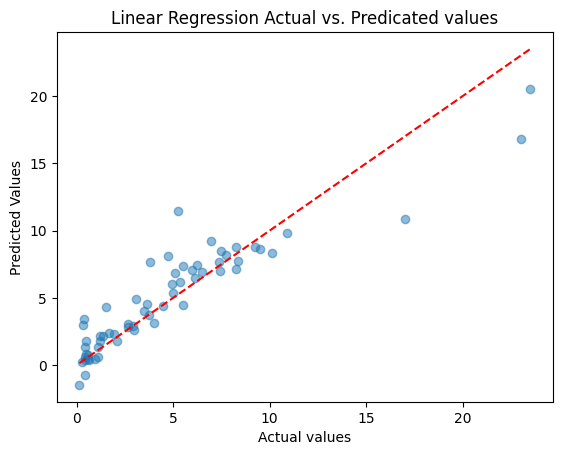

In [21]:
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', linestyle="--")
plt.xlabel('Actual values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Actual vs. Predicated values')
plt.show()

### **Decision Tree Regressor**

In [22]:
param_grid_dt = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

dt_model = DecisionTreeRegressor(random_state=0)
grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=3, n_jobs=-1, scoring='r2')
grid_search_dt.fit(X_train, y_train)
y_pred_dt = grid_search_dt.predict(X_test)

res_dt = r2_score(y_test, y_pred_dt)
print(res_dt)
score = cross_val_score(dt_model, X, y, cv=5, scoring='r2')
print('Cross Val score ', score, score.mean(), score.std())
print('Best Params to use ', grid_search_dt.best_params_)
print("Mean Absolute error: %f" % mean_absolute_error(y_test, y_pred_dt))
print("Root Mean Squared error: %f" % root_mean_squared_error(y_test, y_pred_dt))

0.9126704649724011
Cross Val score  [ 0.91706163  0.6915193  -2.11233401  0.88330919  0.63365774] 0.2026427698862185 1.1625483018608982
Best Params to use  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mean Absolute error: 0.845082
Root Mean Squared error: 1.418339


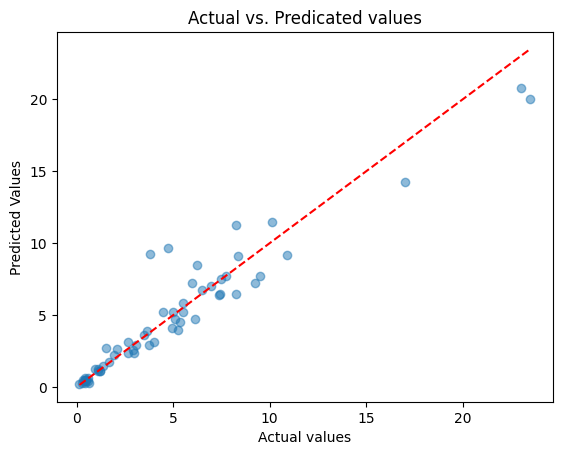

In [25]:
plt.scatter(y_test, y_pred_dt, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', linestyle="--")
plt.xlabel('Actual values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicated values')
plt.show()

### **Random Forest Regressor**

In [23]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [20,30,40],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 4]
}

rf_model = RandomForestRegressor()
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=3, n_jobs=-1, scoring='r2')
grid_search_rf.fit(X_train, y_train)
y_pred_rf = grid_search_rf.predict(X_test)

res = r2_score(y_test, y_pred_rf)
print(res)

score = cross_val_score(dt_model, X, y, cv=5, scoring='r2')
print('Cross Val score ', score, score.mean(), score.std())
print('Best Params to use ', grid_search_rf.best_params_)
print("Mean Absolute error: %f" % mean_absolute_error(y_test, y_pred_rf))
print("Root Mean Squared error: %f" % root_mean_squared_error(y_test, y_pred_rf))

0.9650521494296941
Cross Val score  [ 0.91706163  0.6915193  -2.11233401  0.88330919  0.63365774] 0.2026427698862185 1.1625483018608982
Best Params to use  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mean Absolute error: 0.593971
Root Mean Squared error: 0.897243


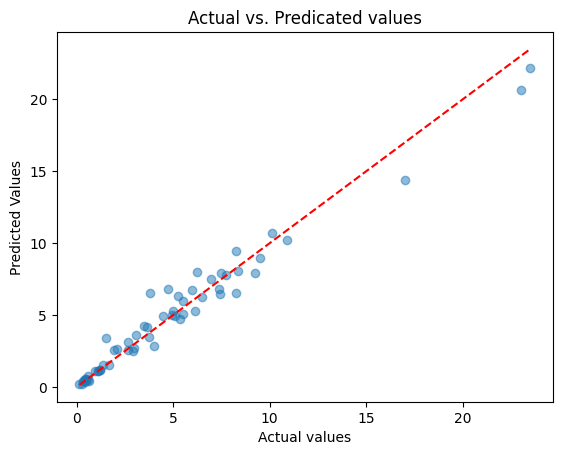

In [24]:
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', linestyle="--")
plt.xlabel('Actual values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicated values')
plt.show()

### **XGBOOST**

In [26]:
param_grid = {
    'n_estimators': [300,400,500],
    'max_depth': [5,6,7],
    'learning_rate': [0.01,0.1,0.2],
    'subsample': [0.6, 0.8, 1.0], 
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5]
}

xgb_model = xgb.XGBRegressor()
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='r2')
grid_search_xgb.fit(X_train, y_train)
y_pred_xgb = grid_search_xgb.predict(X_test)

res = r2_score(y_test, y_pred_xgb)
print(res)

score = cross_val_score(xgb_model, X, y, cv=5, scoring='r2')
print('Cross Val score ', score, score.mean(), score.std())
print('Best Params to use ', grid_search_xgb.best_params_)
print("Mean Absolute error: %f" % mean_absolute_error(y_test, y_pred_xgb))
print("Root Mean Squared error: %f" % root_mean_squared_error(y_test, y_pred_xgb))

0.9654184056570069
Cross Val score  [ 0.95116832  0.74667746 -0.45925027  0.93070828  0.76920624] 0.5877020057911074 0.529922091802144
Best Params to use  {'colsample_bytree': 1.0, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.6}
Mean Absolute error: 0.567853
Root Mean Squared error: 0.892529


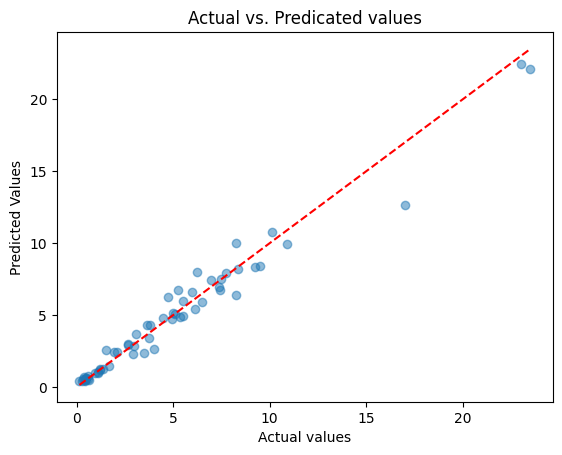

In [27]:
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', linestyle="--")
plt.xlabel('Actual values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicated values')
plt.show()